In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor

from sklearn.feature_selection import RFE

In [6]:
from sklearn.metrics import f1_score, confusion_matrix,\
recall_score, precision_score, accuracy_score
from src.confusion import plot_confusion_matrix
from src.k_classify import predict_one
from src.plot_train import *
from src.euclid import *

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split, KFold

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.drop(labels="ocean_proximity",axis=1, inplace=True)

In [8]:
df.total_bedrooms.mean()

537.8705525375618

In [9]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [10]:
x = df.median_income.values.reshape(-1, 1)
y = df.median_house_value.values.reshape(-1, 1)

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(data=df,
            mask=np.triu(np.ones_like(df, dtype=None)), 
            ax=ax,
            annot = True,
            );

In [39]:
df.shape()

TypeError: 'tuple' object is not callable

In [36]:
y= df.total_bedrooms
x= df.drop(labels='total_bedrooms', axis=1,inplace=True)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 1), (4128, 1), (16512, 1), (4128, 1))

In [51]:
ln= LinearRegression()

In [52]:
ln.fit(x_train, y_train)

LinearRegression()

In [53]:
predy= ln.predict(x_train)

In [54]:
mean_squared_error(y_train, predy)

7039731917.360925

In [ ]:
polynominal_features()

In [7]:
iris = sns.load_dataset('iris')
display(iris)
# Let's convert this over to NumPy array
X = iris.iloc[:, :2].to_numpy()
# Let's convert classes to numerical values
y = LabelEncoder().fit_transform(iris['species'])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

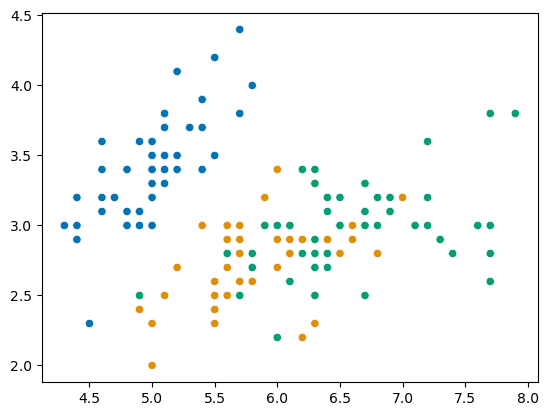

In [9]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax, hue=y, palette='colorblind')
ax.get_legend().remove()

In [10]:
neigh = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(X, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [12]:
titanic = pd.read_csv('cleaned_titanic.csv')
titanic = titanic.iloc[:, :-2]
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male
0,1,0,3,22.0,1,0,7.2500,False,1
1,2,1,1,38.0,1,0,71.2833,False,0
2,3,1,3,26.0,0,0,7.9250,False,0
3,4,1,1,35.0,1,0,53.1000,False,0
4,5,0,3,35.0,0,0,8.0500,False,1


In [13]:
X = titanic[['Age', 'Fare']]
y = titanic['Survived']
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [15]:
X_Train, X_Test, y_train, t_test= train_test_split(X,y, random_state=42, test_size=.25)

In [17]:
X_t, X_Val, y_t, y_Val= train_test_split(X_Train, y_train, random_state=42, test_size= .25)

In [31]:
knn= KNeighborsClassifier(n_neighbors=10)

In [32]:
knn.fit(X_t, y_t)

KNeighborsClassifier(n_neighbors=10)

In [33]:
print(knn.score(X_t,y_t))

0.7194388777555111


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
print(knn.score(X_Val, y_Val))

0.6586826347305389


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix, without normalization
[[82 19]
 [38 28]]


/Users/danielarthur/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


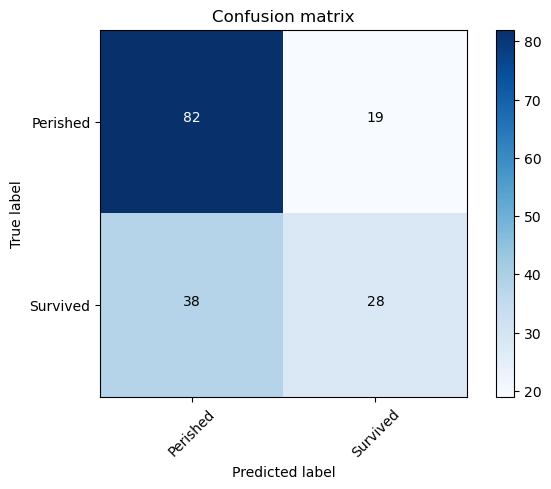

In [35]:
y_hat = knn.predict(X_Val)

plot_confusion_matrix(confusion_matrix(y_Val, y_hat), classes=['Perished', 'Survived'])